In [10]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import re

In [40]:
#데이터 형상 관련 상수
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNEL=3

In [14]:
#학습데이터 준비하기
filenames=os.listdir("C:/Users/student/Downloads/Python_JP/catdog/train/")

In [12]:
len(filenames)

25000

In [15]:
categories=[]
for filename in filenames:
    category=filename.split(".")[0]
    if category=="dog":
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [16]:
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


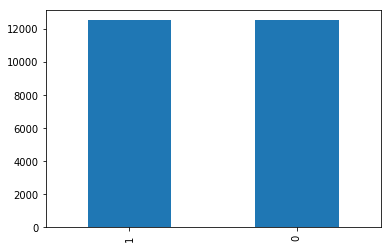

In [20]:
df['category'].value_counts().plot.bar()#1:12500,0:12500

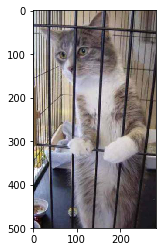

In [27]:
sample=random.choice(filenames)
image=load_img("C:/Users/student/Downloads/Python_JP/catdog/train/"+sample)
plt.imshow(image)

In [28]:
"""
배치정규화(Batch Normalization):신경망 입력 데이터를
평균:0, 분산:1로 정규화를 해서 학습이 잘 이루어지도록
하는 것
fit(batch_size=32)

강아지-레이어1 - 레이어2 - 레이어3 - FC
        (Conv)     ...(flatten)
        (BatchNorm) ...(Dense)
        (Pool)      ...(BatchNorm)
        (DropOut)   ...(DropOut)
"""

'\n배치정규화(Batch Normalization):신경망 입력 데이터를\n평균:0, 분산:1로 정규화를 해서 학습이 잘 이루어지도록\n하는 것\nfit(batch_size=32)\n\n강아지-레이어1 - 레이어2 - 레이어3 - FC\n        (Conv)     ...\n        (BatchNorm) ...\n        (Pool)      ...\n        (DropOut)   ...\n'

In [36]:
from keras.models import Sequential
from keras.layers import *

In [41]:
# 모델 생성
model = Sequential()
# layer1
model.add(Conv2D(32, (3,3), activation='relu', 
                 input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# layer2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# layer3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten
model.add(Flatten())

# Dense
# layer4
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# result
model.add(Dense(2, activation='softmax'))

# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [43]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [44]:
# reducelronplateau : loss가 더 이상 개선되지 않으면 lr을 감소시켜라
# 로컬 미니멈 문제 상당부분 해결

In [45]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [46]:
earlystop=EarlyStopping(patience=10)

In [48]:
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    factor=0.5,
    min_lr=0.00001,
    verbose=1#verbose 출력 형식
)

In [49]:
callbacks=[earlystop,learning_rate_reduction]

In [50]:
# 이미지 제너레이터에서 class_mode='categorfical'로 지정하기
# 컬럼을 string으로 변경함.
df['category']=df['category'].replace({0:'cat', 1:'dog'})

In [51]:
train_df,validate_df=train_test_split(df,test_size=0.2,random_state=42)

In [52]:
train_df

,filename,category
23311,dog.8479.jpg,dog
23623,dog.876.jpg,dog
1020,cat.10915.jpg,cat
12645,dog.10127.jpg,dog
1533,cat.11377.jpg,cat
...,...,...
21575,dog.6916.jpg,dog
5390,cat.36.jpg,cat
860,cat.10771.jpg,cat
15795,dog.1713.jpg,dog


In [56]:
train_df=train_df.reset_index(drop=True)

In [58]:
validate_df.reset_index()

,index,filename,category
0,6868,cat.493.jpg,cat
1,24016,dog.9112.jpg,dog
2,9668,cat.745.jpg,cat
3,13640,dog.11022.jpg,dog
4,14018,dog.11363.jpg,dog
...,...,...,...
4995,8670,cat.6551.jpg,cat
4996,11839,cat.9403.jpg,cat
4997,4013,cat.236.jpg,cat
4998,21147,dog.6530.jpg,dog


In [59]:
validate_df=validate_df.reset_index(drop=True)
validate_df

,filename,category
0,cat.493.jpg,cat
1,dog.9112.jpg,dog
2,cat.745.jpg,cat
3,dog.11022.jpg,dog
4,dog.11363.jpg,dog
...,...,...
4995,cat.6551.jpg,cat
4996,cat.9403.jpg,cat
4997,cat.236.jpg,cat
4998,dog.6530.jpg,dog


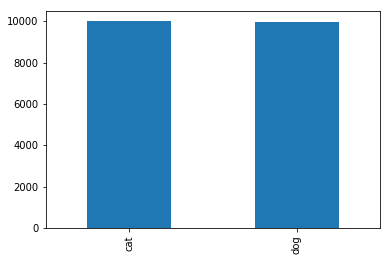

In [62]:
train_df['category'].value_counts().plot.bar()
validate_df['category'].value_counts().plot.bar()

In [68]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [69]:
#트레이닝 데이터 제너레이터 설정

In [70]:
train_datagen=ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [73]:
train_generator=train_datagen.flow_from_dataframe(
    train_df,
    "C:/Users/student/Downloads/Python_JP/catdog/train/",
    x_col="filename",
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [74]:
validation_datagen=ImageDataGenerator(rescale=1./255)
validattion_generator=validation_datagen.flow_from_dataframe(
    validate_df,
    "C:/Users/student/Downloads/Python_JP/catdog/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [77]:
example_df=train_df.sample(n=1).reset_index(drop=True)

In [78]:
example_df

,filename,category
0,dog.51.jpg,dog


In [79]:
example_generator=train_datagen.flow_from_dataframe(
    example_df,
    "C:/Users/student/Downloads/Python_JP/catdog/train/",
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical"
)

Found 1 validated image filenames belonging to 1 classes.


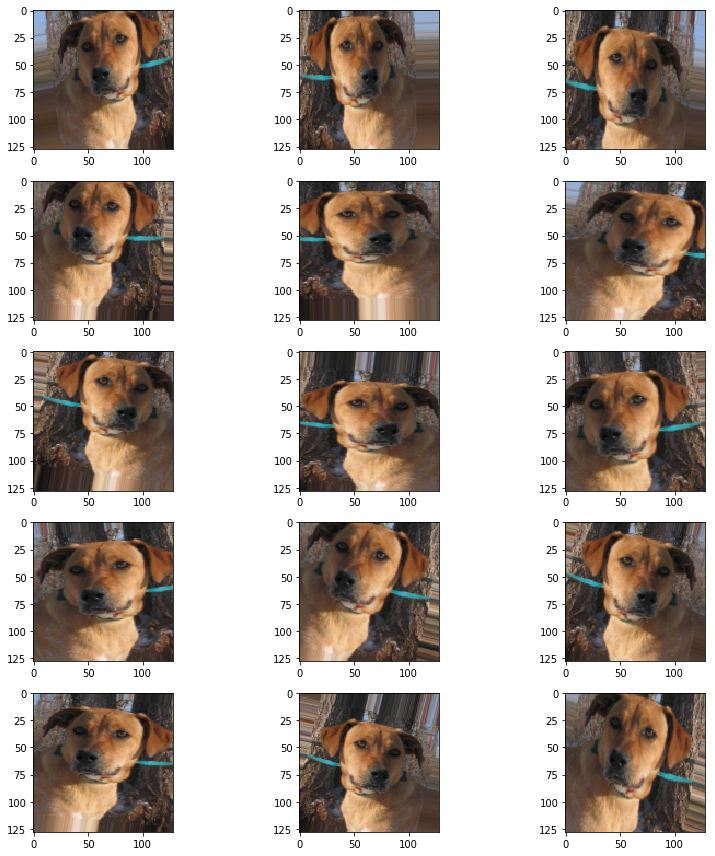

In [83]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1) #(5,3,1)...(5,3,15)
    for xBatch, yBatch in example_generator:
        image=xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [86]:
FAST_RUN=True
epochs=3 if FAST_RUN else 50

In [87]:
#eat는 1에폭당 예상 남은 시간
history=model.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=total_train//batch_size,
    validation_data=validattion_generator,
    validation_steps=total_validate//batch_size,
    callbacks=callbacks
)


Epoch 1/3
1333/1333 [==============================] - 995s 746ms/step - loss: 0.7388 - accuracy: 0.6357 - val_loss: 0.6418 - val_accuracy: 0.6743
Epoch 2/3
1333/1333 [==============================] - 964s 723ms/step - loss: 0.5572 - accuracy: 0.7198 - val_loss: 0.1813 - val_accuracy: 0.7717
Epoch 3/3
1333/1333 [==============================] - 981s 736ms/step - loss: 0.5010 - accuracy: 0.7604 - val_loss: 0.2607 - val_accuracy: 0.8016


In [ ]:
model.save("model.h5")#가중치 외에 다른 여러 요소 같이 저장
# model.save_weights#가중치만 저장

In [ ]:
# 문제1 : 시각화
# history.history['loss']
# history.history['val_loss']
# history.history['accuracy']
# hsitroy.history['val_accuracy']

# 문제2 : 테스트 데이터 
# testdf={'filename' : 테스트파일 }
# nbsamples=testdf.shape[0]

# test_datagen=ImageDataGenerator(rescale=1./255)
# test_generator=test_datagen.flow_from_dataframe(
#     validate_df,
#     "C:/Users/student/Downloads/Python_JP/catdog/test1/",
#     x_col='filename',
#     y_col=None,
#     target_size=IMAGE_SIZE,
#     class_mode=None,
#     batch_size=batch_size,
#     shuffle=False
# )

# 3.예측
# predict=model.predict_generator(
# test_generator, 
# steps=nbsamples/batch_size)

# 4. argmax
# testdf['category']=np.argmax(predict, axis=?)

# 5. 캐글 제출
